In [1]:
#import nltk

#nltk.download('omw-1.4')


In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# get nltk data
nltk.download('stopwords')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# load dataset
news_df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
news_df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
# print unique categories
print(news_df.category.unique())


['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [5]:
# combining some raw data categories that are very close
news_df.category = news_df.category.map(
    lambda x: "WORLD" if x == "WORLDPOST" or x == "THE WORLDPOST" or x == 'WORLD NEWS' else x)
news_df.category = news_df.category.map(
    lambda y: "ARTS & CULTURE" if y == "ARTS" or y == "ARTS & CULTURE" else y)
news_df.category = news_df.category.map(
    lambda z: "EDUCATION" if z == "EDUCATION" or z == "COLLEGE" else z)
news_df.category = news_df.category.map(
    lambda d: "HEALTH" if d == "HEALTHY LIVING" else d)

# removing rows with description size less than 20
mask = news_df['short_description'].str.len() > 20
news_df = news_df.loc[mask]
# combines headline and short_description for the input
news_df['text'] = news_df.headline+" "+news_df.short_description
# replace empty values with NaN
news_df = news_df.replace("", np.NaN)
# drop rows with value as NaN
news_df.dropna(axis=0, inplace=True)

In [6]:
# removing symbols,digits,stopwords from text and lemmatizing each words in the text.
import re
symbols_dt = re.compile('[/(){}\[\]\|@,;]')
symbols_dt2 = re.compile('[^0-9a-z +_]')
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()
    text = symbols_dt.sub(' ', text)  # remove symbols in text data
    text = symbols_dt2.sub('', text)
    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    text = ' '.join([lemmatizer.lemmatize(w) for w in text.split()])
    return text


news_df['text'] = news_df['text'].apply(clean_text)
news_df['text'] = news_df['text'].str.replace('\d+', '')

C:\Users\hario\AppData\Local\Temp\ipykernel_31568\1710453202.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['text'] = news_df['text'].str.replace('\d+', '')


In [7]:
# here v represents each category as an integer in the category_id column.
from io import StringIO
col = ['category', 'text']
# news_df = news_df.reindex(columns=col)


news_df = news_df[col]
news_df = news_df[pd.notnull(news_df['text'])]

news_df.columns = ['category', 'text']
news_df['category_id'] = news_df['category'].factorize()[0]
category_id_df = news_df[['category', 'category_id']
                         ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
# print(category_to_id)
news_df.head()

,category,text,category_id
0,U.S. NEWS,million american roll sleeve omicrontargeted ...,0
1,U.S. NEWS,american airline flyer charged banned life pun...,0
2,COMEDY,funniest tweet cat dog week sept dog dont un...,1
3,PARENTING,funniest tweet parent week sept accidentally ...,2
4,U.S. NEWS,woman called cop black birdwatcher loses lawsu...,0


In [8]:
# set category column as an index
news_df = news_df.set_index("category")
news_df

,text,category_id
category,,
U.S. NEWS,million american roll sleeve omicrontargeted ...,0
U.S. NEWS,american airline flyer charged banned life pun...,0
COMEDY,funniest tweet cat dog week sept dog dont un...,1
PARENTING,funniest tweet parent week sept accidentally ...,2
U.S. NEWS,woman called cop black birdwatcher loses lawsu...,0
...,...,...
TECH,good game possible dont think people play zyng...,5
TECH,google+ open teen safeguard part teen experien...,5
TECH,web war web war threaten rage considerable tim...,5


In [9]:
# drop some categories
news_df = news_df.drop(['IMPACT', 'QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES', 'FIFTY',
                        'WEIRD NEWS', 'ENTERTAINMENT', 'GREEN', 'GOOD NEWS', 'COMEDY', 'PARENTS', 'WOMEN',
                        'POLITICS', 'MEDIA'], axis=0)
news_df = news_df.replace("", np.NaN)
# drop rows with value as NaN
news_df.dropna(axis=0, inplace=True)

In [10]:
# reset the index,
news_df = news_df.reset_index("category")
news_df

,category,text,category_id
0,U.S. NEWS,million american roll sleeve omicrontargeted ...,0
1,U.S. NEWS,american airline flyer charged banned life pun...,0
2,PARENTING,funniest tweet parent week sept accidentally ...,2
3,U.S. NEWS,woman called cop black birdwatcher loses lawsu...,0
4,U.S. NEWS,reporter get adorable surprise boyfriend live ...,0
...,...,...,...
82293,TECH,good game possible dont think people play zyng...,5
82294,TECH,google+ open teen safeguard part teen experien...,5
82295,TECH,web war web war threaten rage considerable tim...,5
82296,TECH,watch top youtube video week youre looking se...,5


In [11]:
category_id_df = news_df[['category', 'category_id']
                         ].sort_values('category_id')
category_to_id = dict(category_id_df.values)
print(category_to_id)

{'U.S. NEWS': 0, 'PARENTING': 2, 'WORLD': 3, 'CULTURE & ARTS': 4, 'TECH': 5, 'SPORTS': 6, 'ENVIRONMENT': 10, 'EDUCATION': 11, 'SCIENCE': 12, 'WELLNESS': 13, 'BUSINESS': 14, 'CRIME': 15, 'STYLE & BEAUTY': 16, 'FOOD & DRINK': 17, 'HOME & LIVING': 20, 'TRAVEL': 23, 'MONEY': 24, 'RELIGION': 25, 'WEDDINGS': 28, 'ARTS & CULTURE': 30, 'STYLE': 31, 'TASTE': 33, 'HEALTH': 34, 'DIVORCE': 37}


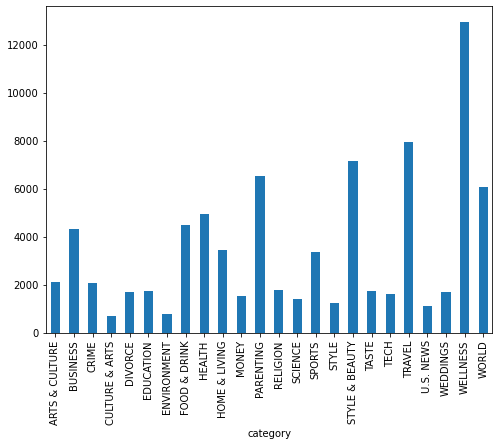

In [12]:
# ploting each category and corresponding no of samples - bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
news_df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [13]:
# to get the info about our preprocessed news dataframe
news_df.category.value_counts()

WELLNESS          12942
TRAVEL             7943
STYLE & BEAUTY     7158
PARENTING          6519
WORLD              6082
HEALTH             4941
FOOD & DRINK       4485
BUSINESS           4328
HOME & LIVING      3422
SPORTS             3351
ARTS & CULTURE     2117
CRIME              2075
RELIGION           1757
EDUCATION          1739
TASTE              1735
WEDDINGS           1704
DIVORCE            1695
TECH               1593
MONEY              1537
SCIENCE            1394
STYLE              1221
U.S. NEWS          1091
ENVIRONMENT         778
CULTURE & ARTS      691
Name: category, dtype: int64

**Extracting feaure vectors**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
d = news_df["text"].__iter__()
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(d)
labels = news_df.category_id
features.shape

(82298, 46887)

**Unigrams and Bigrams**

In [15]:
from sklearn.feature_selection import chi2
N = 2
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

    print(f"{category}")
    nwline = '\n. '
    print(f"correlated unigrams:{nwline}{nwline.join(unigrams[-N:])}")
    print(f"correlated bigrams:{nwline}{nwline.join(bigrams[-N:])}")

C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ARTS & CULTURE
correlated unigrams:
. art
. artist
correlated bigrams:
. handmaid tale
. first nighter
BUSINESS
correlated unigrams:
. company
. business
correlated bigrams:
. woman business
. wall st


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CRIME
correlated unigrams:
. cop
. police
correlated bigrams:
. police said
. police say
CULTURE & ARTS
correlated unigrams:
. canvas
. imageblog
correlated bigrams:
. acrylic canvas
. oil canvas


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


DIVORCE
correlated unigrams:
. divorced
. divorce
correlated bigrams:
. child divorce
. divorce divorce
EDUCATION
correlated unigrams:
. education
. student
correlated bigrams:
. charter school
. higher education


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ENVIRONMENT
correlated unigrams:
. keystone
. climate
correlated bigrams:
. keystone xl
. climate change
FOOD & DRINK
correlated unigrams:
. cocktail
. recipe
correlated bigrams:
. recipe make
. taste test


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


HEALTH
correlated unigrams:
. gps
. zika
correlated bigrams:
. appeared quietrevcom
. gps guide
HOME & LIVING
correlated unigrams:
. craft
. home
correlated bigrams:
. home twitter
. craft day


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MONEY
correlated unigrams:
. tax
. credit
correlated bigrams:
. credit card
. credit score
PARENTING
correlated unigrams:
. child
. parent
correlated bigrams:
. special need
. baby name


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


RELIGION
correlated unigrams:
. christian
. pope
correlated bigrams:
. maintaining personal
. daily meditation


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


SCIENCE
correlated unigrams:
. scientist
. nasa
correlated bigrams:
. scientist say
. solar system
SPORTS
correlated unigrams:
. player
. nfl
correlated bigrams:
. tom brady
. lebron james
STYLE
correlated unigrams:
. kendall
. jenner
correlated bigrams:
. gigi hadid
. kendall jenner


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


STYLE & BEAUTY
correlated unigrams:
. style
. fashion
correlated bigrams:
. huffpost style
. want sure
TASTE
correlated unigrams:
. delicious
. recipe
correlated bigrams:
. meal prep
. cooking cuff


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TECH
correlated unigrams:
. google
. apple
correlated bigrams:
. apple rumor
. video week
TRAVEL
correlated unigrams:
. hotel
. travel
correlated bigrams:
. national park
. road trip
U.S. NEWS
correlated unigrams:
. uvalde
. covid
correlated bigrams:
. santa anita
. border patrol


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WEDDINGS
correlated unigrams:
. bride
. wedding
correlated bigrams:
. wedding planning
. wedding day
WELLNESS
correlated unigrams:
. cancer
. health
correlated bigrams:
. breast cancer
. health care


C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WORLD
correlated unigrams:
. syria
. korea
correlated bigrams:
. prime minister
. north korea


In [16]:
# train the classifier
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(news_df['text'],
                                                    news_df['category'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
# print(clf)

**Make Predictions**

In [17]:
print(clf.predict(count_vect.transform([
    "Instagram updating content-banning policies on app"
])))

['STYLE & BEAUTY']


In [18]:
print(clf.predict(count_vect.transform([
    "Climate change poses mental health risks to children and teens"
])))

['WELLNESS']


In [19]:
print(clf.predict(count_vect.transform([
    "NASA scientist defends use of NUCLEAR weapons on asteroid"
])))

['SCIENCE']


In [20]:
print(clf.predict(count_vect.transform([
    """A ‘Haunted’ Hotel in Colorado Is Reopening With an Even Creepier Vibe  
    """
]
)))

['TRAVEL']


In [21]:
print(clf.predict(count_vect.transform([

    "Champions League Final: Gary Lineker backs Liverpool to beat Tottenham in Madrid"

])))

['SPORTS']


**Build models**

In [22]:
# using LinearSVC
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    features, labels, news_df.index, test_size=0.33, random_state=0
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
# classification report showing model evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred,
                                    target_names=news_df['category'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

                precision    recall  f1-score   support

     U.S. NEWS       0.43      0.23      0.30       350
     PARENTING       0.68      0.74      0.71      2145
         WORLD       0.77      0.80      0.78      2000
CULTURE & ARTS       0.46      0.14      0.22       229
          TECH       0.66      0.50      0.57       557
        SPORTS       0.76      0.82      0.79      1069
   ENVIRONMENT       0.54      0.37      0.44       251
     EDUCATION       0.62      0.60      0.61       529
       SCIENCE       0.62      0.50      0.56       444
      WELLNESS       0.62      0.76      0.68      4355
      BUSINESS       0.57      0.58      0.58      1405
         CRIME       0.68      0.68      0.68       674
STYLE & BEAUTY       0.79      0.84      0.82      2417
  FOOD & DRINK       0.62      0.69      0.65      1472
 HOME & LIVING       0.79      0.77      0.78      1126
        TRAVEL       0.77      0.83      0.80      2722
         MONEY       0.53      0.44      0.48  

In [24]:
# using multinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    features, labels, news_df.index, test_size=0.33, random_state=0
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred,
                                    target_names=news_df['category'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

                precision    recall  f1-score   support

     U.S. NEWS       0.00      0.00      0.00       350
     PARENTING       0.67      0.45      0.54      2145
         WORLD       0.61      0.80      0.69      2000
CULTURE & ARTS       1.00      0.00      0.01       229
          TECH       0.97      0.06      0.11       557
        SPORTS       0.90      0.48      0.63      1069
   ENVIRONMENT       1.00      0.01      0.02       251
     EDUCATION       0.96      0.05      0.09       529
       SCIENCE       0.88      0.03      0.06       444
      WELLNESS       0.32      0.97      0.48      4355
      BUSINESS       0.59      0.28      0.38      1405
         CRIME       0.85      0.31      0.46       674
STYLE & BEAUTY       0.70      0.82      0.76      2417
  FOOD & DRINK       0.66      0.50      0.57      1472
 HOME & LIVING       0.97      0.40      0.57      1126
        TRAVEL       0.61      0.81      0.70      2722
         MONEY       1.00      0.02      0.04  

C:\Users\hario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
